In [ ]:
# Image blurring
import numpy as np
import cv2

# load image in grayscale mode
image = cv2.imread('coming_pic.png', 0)

# create kernel
kernel = np.ones((15,15), np.float32) / 225.0

# compute mean for each pixel
dst = cv2.filter2D(image, cv2.CV_8U, kernel)

# show images
cv2.imshow('image', image)
cv2.imshow('dst', dst)

# waiting for any keys pressed and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

In [ ]:
# Face Detection
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
image = cv2.imread('coming_pic.png', 1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
kernel = np.ones((9,9), np.float32) / 81

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi=image[y:y+h,x:x+w]
    
    roi=cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi=cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi=cv2.filter2D(roi, cv2.CV_8U, kernel)
    
    image[y:y+h,x:x+w]=roi
    
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


: 

In [10]:
import numpy as np
import cv2

# load image in grayscale mode
image = cv2.imread('mrbean_noise.jpg', 1)
b, g, r = cv2.split(image)

# show images
cv2.imwrite("output.png",image)

True

In [16]:
import numpy as np
import cv2

image=cv2.imread("mrbean_noise.jpg")
image_1=cv2.medianBlur(image,3)
cv2.imwrite("output.png",image_1)

True

In [3]:
import numpy as np
import cv2
from scipy.ndimage.filters import generic_filter

# 1. Đọc ảnh và chuyển sang grayscale
img = cv2.imread('img.jpg')  
print(img.shape)
# Đọc ảnh gốc
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # Chuyển sang ảnh xám
cv2.imwrite('edge_s1.jpg', gray)                      # Lưu ảnh xám gốc

# 2. Chuyển sang float để tính toán chính xác
x = gray.astype('float')

# 3. Áp dụng kernel 7x7 với hàm np.std (tính standard deviation)
x_filt = generic_filter(x, np.std, size=7)
cv2.imwrite('edge_s2.jpg', x_filt)                    # Lưu ảnh thể hiện texture theo độ lệch chuẩn
print(x_filt.shape)
# 4. Ngưỡng hóa (threshold): loại bỏ các vùng phẳng (texture yếu)
x_filt[x_filt < 20] = 0
cv2.imwrite('edge_s3.jpg', x_filt)                    # Lưu ảnh sau khi lọc

# 5. In giá trị lớn nhất để biết độ nổi bật của texture
maxv = np.max(x_filt)
print("Max value in filtered image:", maxv)

# 6. Khuếch đại contrast để dễ nhìn hơn
x_filt = x_filt * 2.5
cv2.imwrite('edge_s4.jpg', x_filt)              

/var/folders/g0/t3mty5h57ll3h857rnpm6c9c0000gn/T/ipykernel_4858/2104202411.py:3: DeprecationWarning: Please import `generic_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import generic_filter


(496, 664, 3)
(496, 664)
Max value in filtered image: 113.25462718549494


True

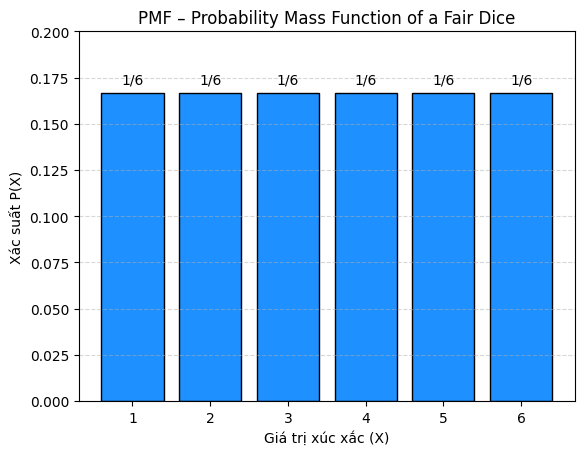

In [2]:
import matplotlib.pyplot as plt

# Các giá trị có thể xuất hiện khi tung xúc xắc
x = [1, 2, 3, 4, 5, 6]

# Xác suất cho từng giá trị (đều nhau)
pmf = [1/6] * 6  # mỗi giá trị đều có xác suất bằng nhau

# Vẽ biểu đồ cột
plt.bar(x, pmf, color='dodgerblue', edgecolor='black')

# Gắn nhãn trục
plt.xlabel('Giá trị xúc xắc (X)')
plt.ylabel('Xác suất P(X)')
plt.title('PMF – Probability Mass Function of a Fair Dice')

# Gắn giá trị lên đầu mỗi cột
for i in range(len(x)):
    plt.text(x[i], pmf[i] + 0.005, "1/6", ha='center')

# Hiển thị
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


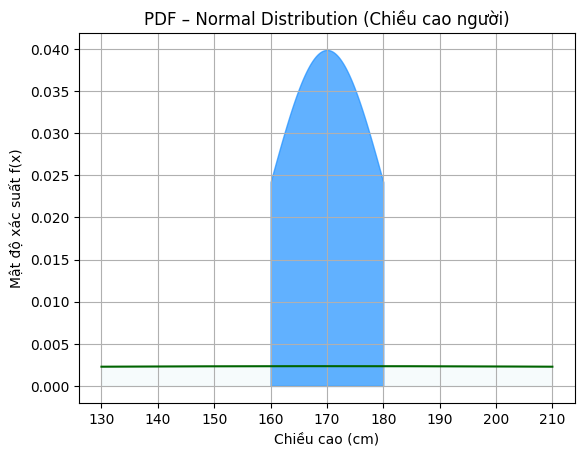

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tạo giá trị liên tục
x = np.linspace(130, 210, 500)

# Tạo PDF với mean = 170, std = 10
pdf = norm.pdf(x, loc=170, scale=170)

# Vẽ đường PDF
plt.plot(x, pdf, color='darkgreen')

# Tô mờ toàn bộ vùng dưới đường cong (nếu muốn)
plt.fill_between(x, pdf, alpha=0.1, color='lightblue')

# Tô đậm vùng từ 160 đến 180
x_fill = np.linspace(160, 180, 200)
pdf_fill = norm.pdf(x_fill, loc=170, scale=10)
plt.fill_between(x_fill, pdf_fill, color='dodgerblue', alpha=0.7)

# Thêm nhãn và tiêu đề
plt.title('PDF – Normal Distribution (Chiều cao người)')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Mật độ xác suất f(x)')
plt.grid(True)
plt.show()



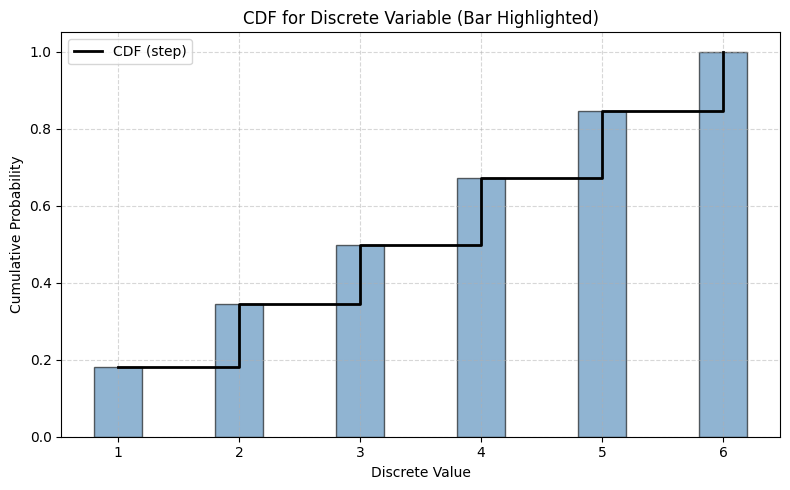

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 1. Sinh dữ liệu rời rạc (giống xúc xắc)
np.random.seed(42)
data = np.random.randint(1, 7, size=1000)

# 2. Đếm tần suất và tính CDF
counts = Counter(data)
values = np.array(sorted(counts.keys()))
frequencies = np.array([counts[val] for val in values])
cdf = np.cumsum(frequencies) / sum(frequencies)

# 3. Vẽ step CDF kèm bar cho từng bậc
plt.figure(figsize=(8, 5))

# Vẽ hàm CDF dạng bậc thang
plt.step(values, cdf, where='post', label='CDF (step)', color='black', linewidth=2)

# Tô đậm từng bậc bằng các cột riêng
for i, val in enumerate(values):
    plt.bar(val, cdf[i], width=0.4, alpha=0.6, color='steelblue', edgecolor='black')

# 4. Trang trí biểu đồ
plt.title("CDF for Discrete Variable (Bar Highlighted)")
plt.xlabel("Discrete Value")
plt.ylabel("Cumulative Probability")
plt.xticks(values)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()



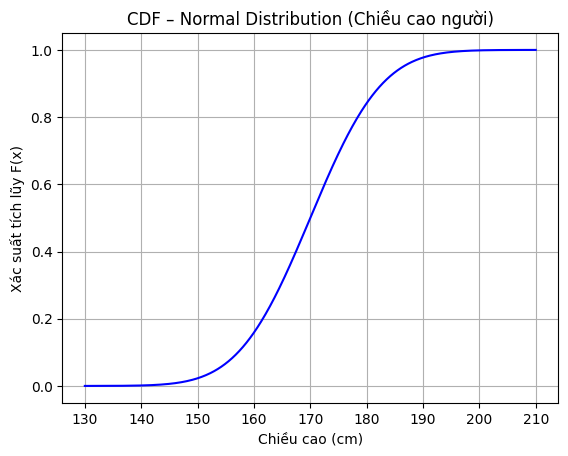

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(130, 210, 500)
cdf = norm.cdf(x, loc=170, scale=10)

plt.plot(x, cdf, color='blue')
plt.title('CDF – Normal Distribution (Chiều cao người)')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Xác suất tích lũy F(x)')
plt.grid(True)
plt.show()


Xác suất từ 140 đến 170: 0.6000


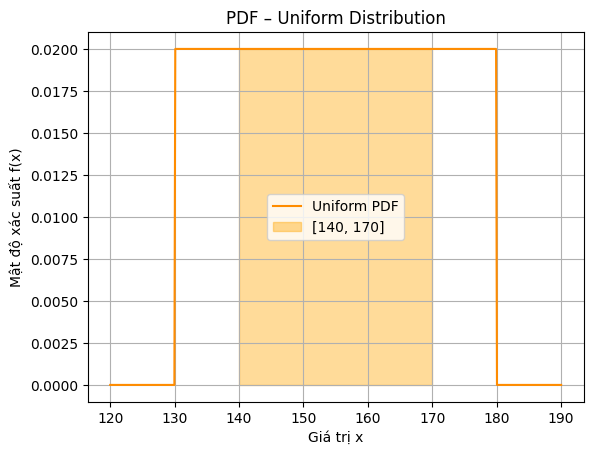

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Khoảng giá trị đều
a = 130
b = 180

# Tạo các điểm x liên tục để vẽ
x = np.linspace(120, 190, 500)

# PDF phân phối đều
pdf = uniform.pdf(x, loc=a, scale=b - a)

# Tính xác suất từ x1 đến x2
x1 = 140
x2 = 170
area = uniform.cdf(x2, loc=a, scale=b - a) - uniform.cdf(x1, loc=a, scale=b - a)
print(f"Xác suất từ {x1} đến {x2}: {area:.4f}")

# Vẽ biểu đồ
plt.plot(x, pdf, color='darkorange', label='Uniform PDF')
plt.fill_between(x, pdf, where=(x >= x1) & (x <= x2), color='orange', alpha=0.4, label=f'[{x1}, {x2}]')
plt.title('PDF – Uniform Distribution')
plt.xlabel('Giá trị x')
plt.ylabel('Mật độ xác suất f(x)')
plt.legend()
plt.grid(True)
plt.show()


Xác suất trong khoảng [140, 170]: 0.6000


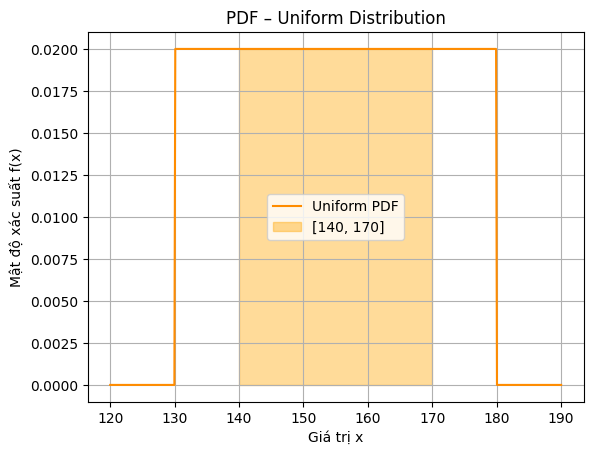

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Tham số đầu vào
x_input = 180

# Thiết lập phân phối chuẩn
mean = 170
std = 0

# Dữ liệu cho đồ thị
x = np.linspace(130, 210, 500)
cdf = uniform.cdf(x, loc=mean, scale=std)
cdf_val = uniform.cdf(x_input, loc=mean, scale=std)

# Vẽ biểu đồ CDF
plt.plot(x, cdf, color='blue', label='CDF')
plt.axvline(x=x_input, color='blue', linestyle='--', label=f'x = {x_input}')
plt.axhline(y=cdf_val, color='gray', linestyle='--')

# Đánh dấu điểm và hiển thị xác suất trên trục y
plt.plot(x_input, cdf_val, 'ro')  # Đánh dấu tại điểm giao
plt.text(130, cdf_val, f'{cdf_val:.4f}', va='center', ha='left', fontsize=10, color='black')

# Trang trí biểu đồ
plt.title('CDF – Normal Distribution (Chiều cao người)')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Xác suất tích lũy F(x)')
plt.grid(True)
plt.legend()
plt.show()



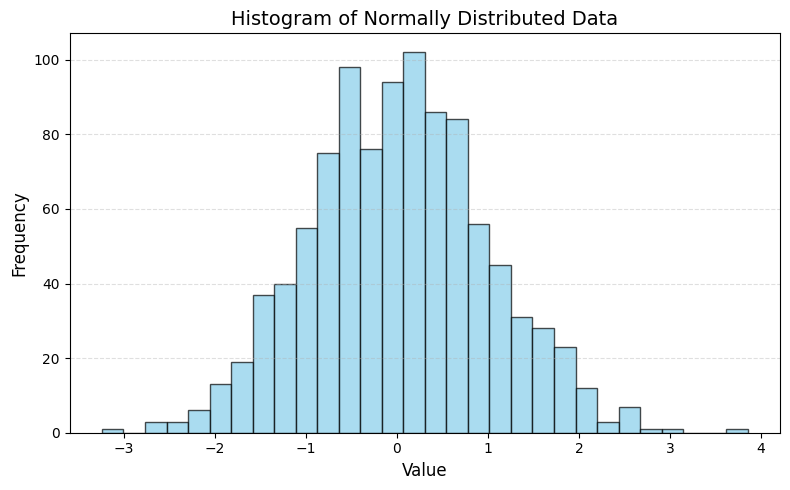

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sinh dữ liệu: 1000 giá trị từ phân phối chuẩn (mean=0, std=1)
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

# 2. Vẽ histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# 3. Trang trí
plt.title("Histogram of Normally Distributed Data", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# 4. Hiển thị
plt.show()

